https://github.com/karim-sharkawy/Notions-of-Positivity-and-Complexity-in-Quantum-Information-Theory

**Always run the first block underneath**

In [ ]:
import numpy as np

extendable_class = np.load("/content/extendableMappings.npy")
nonextendable_class = np.load("/content/nonExtendableMappings.npy")
goodclassifier_class = np.load("/content/trueClassifiersGoodMORE.npy")

# Create a new list to store reshaped matrices
reshaped_matrices = []

# Loop over each element in goodclassifier_class and reshape
for i in range(len(goodclassifier_class)):
    reshaped_matrix = goodclassifier_class[i].reshape((4, 4))
    reshaped_matrices.append(reshaped_matrix)

# Convert the list of reshaped matrices to a NumPy array
reshaped_goodclassifier_class = np.array(reshaped_matrices)
reshaped_goodclassifier_class = reshaped_goodclassifier_class.astype(int)

print("The number of good classifiers: ", len(reshaped_goodclassifier_class))

The number of good classifiers:  1110


# **Testing Classifiers**

In [ ]:
import numpy as np

GoodClassdict = 0
failedAbs = 0
failedSec = 0
# Checking the absolute value condition
for matrix_index in range(len(reshaped_goodclassifier_class)):  # Iterate over matrices
    matrix = -reshaped_goodclassifier_class[matrix_index]  # Get the matrix at the current index
    all_rows_satisfy_condition = True  # Flag to track if all rows satisfy the condition
    for i in range(4):  # Iterate over rows of the matrix
        row = matrix[i]
        diff1 = np.abs(row[3] - row[2])  # Calculate differences for one set of adjacent elements
        diff2 = np.abs(row[1] - row[0])  # Calculate differences for the next set of adjacent elements
        if not np.all(diff1 <= diff2):  # Check if any row fails the condition
            all_rows_satisfy_condition = False
            print(matrix, "Fails absolute condition in row:", i)
            failedAbs += 1
            break  # Move on to the next matrix
    if not all_rows_satisfy_condition:
        continue  # Move on to the next matrix
    for i in range(4):  # Iterate over rows of the matrix
        row = matrix[i]
        diff1 = row[3] + row[2]  # Calculate differences for one set of adjacent elements
        diff2 = row[1] - 3*(row[0])  # Calculate differences for the next set of adjacent elements
        diff3 = -2*(row[0])
        if not np.all(diff1 <= diff2 <= diff3):  # Check if any row fails the condition
            all_rows_satisfy_condition = False
            print(matrix, "Fails second condition in row:", i)
            failedSec += 1
            break  # Move on to the next matrix
    if all_rows_satisfy_condition:
        print(matrix)  # Print the matrix if all rows satisfy the condition
        GoodClassdict += 1
print("Number of Classifiers that pass all conditions:", GoodClassdict)
print("Number of Classifiers that failed the first condition:", failedAbs)
print("Number of Classifiers that failed the second conditions", failedSec)

[[ 1  5 -1  6]
 [ 1  2 -1  3]
 [-1 -2  1 -3]
 [ 2  8 -2 12]] Fails absolute condition in row: 0
[[-1  5  2  2]
 [ 3  2  0  6]
 [ 1  0 -1  2]
 [ 1  7  3  5]] Fails absolute condition in row: 1
[[-1  4  1  3]
 [ 5  1 -1  6]
 [ 1  0  0  1]
 [ 3  5  1  7]] Fails absolute condition in row: 1
[[-1  5  2  2]
 [ 3  2 -1  6]
 [ 1  0 -1  2]
 [ 1  7  2  6]] Fails absolute condition in row: 1
[[ 0  7  7  0]
 [ 0  4  4  0]
 [ 0  0  0  0]
 [ 0 10 11  0]] Fails absolute condition in row: 3
[[-1  6  3  3]
 [ 5  0  6 -1]
 [ 1  0  1  1]
 [ 3  5  8  1]] Fails absolute condition in row: 1
[[ 1  2  6 -3]
 [ 1  7  3  5]
 [-1  1 -3  3]
 [ 3  9 12 -1]] Fails absolute condition in row: 0
[[ 2  5  8 -1]
 [ 2  0  3 -1]
 [-2  0 -3  1]
 [ 7  6 15 -2]] Fails absolute condition in row: 0
[[ -4  -3 -10   3]
 [ 13   8  29  -8]
 [  4   3  10  -3]
 [  4   3  10  -2]] Fails absolute condition in row: 0
[[ 0  8  8  0]
 [ 2  1  6 -2]
 [ 0  1  1  0]
 [ 2  8 12 -2]] Fails absolute condition in row: 1
[[-1  5  2  2]
 [ 3  2 -

# **Ploting extendable, nonextendable, and classifiers on a 3d plane**

**The code below has something off, and I don't know how to fix it. In order for the 'zip' function to work properly, 6 values are needed for every row (because 6 values are asked of it: X, Y, Z, U, V, and W). Hence, 'soa' is needed here every matrix that's feeded only has 3 values. What do I do here? I don't understand the problem a whole lot, so I thought I would point this out**

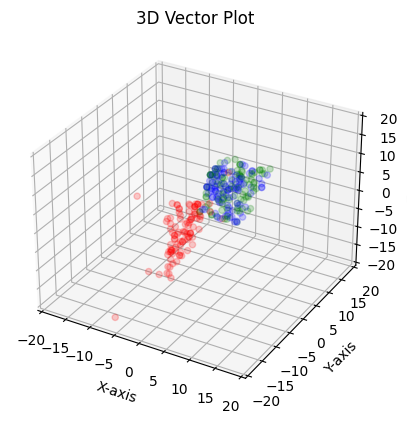

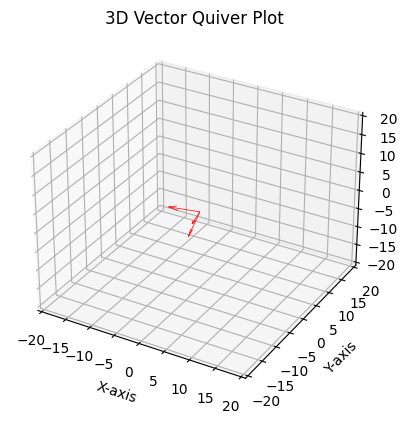

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

#soa = np.array([[0, 0, 0, 0, -4, -4], [0, 0, 0, -7, 1, -2],
                #[0, 0, 0, -1, -1, -3], [0, 0, 0, -6, -2, -3]])

soa = np.array([[0, 0, 0, 0, -4, -4], [0, 0, 0, -7, 1, -2],
                [0, 0, 0, -1, -1, -3]])

# Assign colors and labels to each set of vectors
colors = ['r', 'g', 'b', 'y']
labels = ['Good Classifier', 'Extends', "Doesn't Extend", 'Farthest B']

# Create a new figure and axis for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot classifiers
for i in range(25):
    soa0 = reshaped_goodclassifier_class[i]
    soa0 = soa0[:, :-1]  # delete the last column bc we don't use it to graph
    ax.scatter(soa0[:, 0], soa0[:, 1], soa0[:, 2], color=colors[0], alpha=0.2)

# Plot extendable mappings
for i in range(25):
    soa1 = extendable_class[i]
    soa1 = soa1[:, :-1]  # delete the last column bc we don't use it to graph
    ax.scatter(soa1[:, 0], soa1[:, 1], soa1[:, 2], color=colors[1], alpha=0.2)

# Plot nonextendable mappings
for i in range(25):
    soa2 = nonextendable_class[i]
    soa2 = soa2[:, :-1]  # delete the last column bc we don't use it to graph
    ax.scatter(soa2[:, 0], soa2[:, 1], soa2[:, 2], color=colors[2], alpha=0.2)

# Set limits for the axes
ax.set_xlim([-20, 20])
ax.set_ylim([-20, 20])
ax.set_zlim([-20, 20])

# Set labels for the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Set title for the plot
plt.title('3D Vector Plot')

# Show the plot
plt.show()

# Create a new figure and axis for quiver plot (vector plot)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Unpack the arrays for plotting
#soa_combined = np.vstack(reshaped_goodclassifier_class)
#X, Y, Z, U, V, W = zip(*soa_combined[:, :-1])
X, Y, Z, U, V, W = zip(*soa)

# Plot each set of vectors using quiver plot
ax.quiver(X, Y, Z, U, V, W, color=colors[0], linewidth=0.5)

# Set limits for the axes
ax.set_xlim([-20, 20])
ax.set_ylim([-20, 20])
ax.set_zlim([-20, 20])

# Set labels for the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Set title for the plot
plt.title('3D Vector Quiver Plot')

# Show the plot
plt.show()

**This block below shows the error when trying to use other things like 'soa0'.**

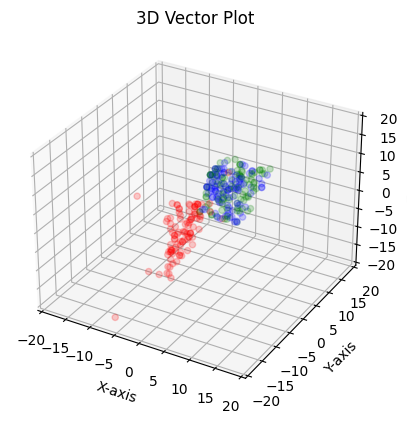

ValueError: not enough values to unpack (expected 6, got 3)

In [ ]:
#Testing
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# NEEDED IMPROVEMENT: adding extreme points

# Assign colors and labels to each set of vectors
colors = ['r', 'g', 'b', 'y']
labels = ['Good Classifier', 'Extends', "Doesn't Extend", 'Farthest B']

# Create a new figure and axis for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot classifiers
for i in range(25):
    soa0 = reshaped_goodclassifier_class[i]
    soa0 = soa0[:, :-1]  # delete the last column bc we don't use it to graph
    ax.scatter(soa0[:, 0], soa0[:, 1], soa0[:, 2], color=colors[0], label=labels[0], alpha=0.2)

# Plot extendable mappings
for i in range(25):
    soa1 = extendable_class[i]
    soa1 = soa1[:, :-1]  # delete the last column bc we don't use it to graph
    ax.scatter(soa1[:, 0], soa1[:, 1], soa1[:, 2], color=colors[1], label=labels[1], alpha=0.2)

# Plot nonextendable mappings
for i in range(25):
    soa2 = nonextendable_class[i]
    soa2 = soa2[:, :-1]  # delete the last column bc we don't use it to graph
    ax.scatter(soa2[:, 0], soa2[:, 1], soa2[:, 2], color=colors[2], label=labels[2], alpha=0.2)

# Set limits for the axes
ax.set_xlim([-20, 20])
ax.set_ylim([-20, 20])
ax.set_zlim([-20, 20])

# Set labels for the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Set title for the plot
plt.title('3D Vector Plot')

# Show the plot
plt.show()

# Unpack the arrays for plotting
X, Y, Z, U, V, W = zip(*soa0)
# Plot each set of vectors using quiver plot
ax.quiver(X, Y, Z, U, V, W, color=colors[0], label=labels[0], linewidth=0.5)

**The code below is a neural network. This may not be useful, because NNs check for mainly non-linear relationships, but I was playing around with this stuff. Feel free to delete it if it's not useful :)**

In [ ]:
# testing w/ML

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Combine extendable and non-extendable matrices for training the neural network
X_extendable = extendable_class.reshape((-1, 16))[:, :-1]
X_nonextendable = nonextendable_class.reshape((-1, 16))[:, :-1]
X = np.vstack((X_extendable, X_nonextendable))
y = np.hstack((np.ones(len(X_extendable)), np.zeros(len(X_nonextendable))))  # Label extendable as 1, non-extendable as 0

# Shuffle the data
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Define the neural network architecture
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.2524 - accuracy: 0.8919 - val_loss: 0.1415 - val_accuracy: 0.9488
Epoch 2/10
2000/2000 [==============================] - 5s 3ms/step - loss: 0.1068 - accuracy: 0.9605 - val_loss: 0.0803 - val_accuracy: 0.9724
Epoch 3/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0663 - accuracy: 0.9750 - val_loss: 0.0604 - val_accuracy: 0.9772
Epoch 4/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0514 - accuracy: 0.9800 - val_loss: 0.0453 - val_accuracy: 0.9821
Epoch 5/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0428 - accuracy: 0.9838 - val_loss: 0.0447 - val_accuracy: 0.9826
Epoch 6/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0381 - accuracy: 0.9848 - val_loss: 0.0410 - val_accuracy: 0.9840
Epoch 7/10
2000/2000 [==============================] - 5s 3ms/step - loss: 0.0326 - accuracy: 0.9872 - val_loss: 0.0312 - val_accuracy:

**Analyzing the results**

The training loss decreases consistently over the epochs, indicating that the model is learning and improving its performance on the training data.
Moreover, it's fitting the training data well. Prove further by the test loss of 0.0269 and test accuracy of 98.98%, which confirm that the model performs very well on the test dataset

The validation accuracy remains high throughout, indicating that the model generalizes well to unseen data during training.

No sign of overfitting or underfitting

# **Properties of the matrices**

In [ ]:
import numpy as np

def find_basis_vectors(matrix):
    # Perform QR decomposition
    Q, R = np.linalg.qr(matrix)

    # Find the rank of the matrix to determine the number of basis vectors
    rank = np.linalg.matrix_rank(matrix)

    # The basis vectors for the column space are the first 'rank' columns of Q
    basis_vectors = Q[:, :rank]

    return basis_vectors

# Example usage
matrix = np.array([
    [-2, 6, 2, 2],
    [ 7, 1, 3, 5],
    [ 0, 0, 0, 0],
    [ 5, 7, 5, 7]])

basis_vectors = find_basis_vectors(matrix)
print("Original Matrix:\n", matrix)
print("\nBasis Vectors for the Column Space:\n", basis_vectors)


Original Matrix:
 [[-2  6  2  2]
 [ 7  1  3  5]
 [ 0  0  0  0]
 [ 5  7  5  7]]

Basis Vectors for the Column Space:
 [[-0.22645541 -0.78446454]
 [ 0.79259392  0.19611614]
 [ 0.          0.        ]
 [ 0.56613852 -0.58834841]]


**Basis, eigenvectors, and eigenvalues**

In [ ]:
for matrix_index in range(5):
    # Get the matrix at the current index
    matrix = extendable_class[matrix_index]

    # Compute the eigenvalues and eigenvectors of the product matrix.T @ matrix
    eigenvalues, eigenvectors = np.linalg.eig(matrix.T @ matrix)

    # The basis vectors are the eigenvectors
    basis = eigenvectors

    # Print the matrix, its basis using eigendecomposition, and its eigenvalues
    print(f"Matrix {matrix_index + 1}: \n{matrix}\n")
    print(f"Basis of the matrix using Eigendecomposition: \n{basis}\n")
    print(f"Eigenvalues: {eigenvalues}\n")

Matrix 1: 
[[-2  6  2  2]
 [ 7  1  3  5]
 [ 0  0  0  0]
 [ 5  7  5  7]]

Basis of the matrix using Eigendecomposition: 
[[-0.47530894 -0.71270778  0.51587695 -0.06261907]
 [-0.51643908  0.69519111  0.48461168  0.06335733]
 [-0.40758465  0.05682949 -0.29702006 -0.81921577]
 [-0.58416337 -0.07434616 -0.64093803  0.56652469]]

Eigenvalues: [ 2.27726849e+02  5.22731512e+01 -4.71225445e-15 -1.61128967e-15]

Matrix 2: 
[[ 6  7  5  8]
 [-3  9  3  3]
 [ 4  7  7  4]
 [-1  9  1  7]]

Basis of the matrix using Eigendecomposition: 
[[-0.17485555 -0.83426803  0.5         0.15304374]
 [-0.73667459  0.42329676  0.5        -0.16772119]
 [-0.38062356 -0.34755605 -0.5        -0.69593857]
 [-0.53090658 -0.06341522 -0.5         0.68126112]]

Eigenvalues: [ 4.55469834e+02  6.83942652e+01 -6.53777080e-15  2.01359005e+01]

Matrix 3: 
[[-2  9  4  3]
 [ 9  0  9  0]
 [-1  8  6  1]
 [ 8  1  7  2]]

Basis of the matrix using Eigendecomposition: 
[[ 0.51988882 -0.61369571  0.5         0.32108128]
 [ 0.37510377  0.

**Null & Column Space**

In [ ]:
# Functions to find the null/column spaces
# Null space
def null_space(matrix, tol=1e-14):
    u, s, vh = np.linalg.svd(matrix)
    null_mask = (s <= tol)
    null_space_vectors = vh[null_mask]  # Select columns corresponding to null space
    return null_space_vectors

# Null Space Basis
def null_space_basis(matrix, tol=1e-14):
    u, s, vh = np.linalg.svd(matrix)
    null_mask = (s <= tol)
    null_basis = np.compress(null_mask, vh, axis=0).T
    return null_basis

# Column Space
def column_space(matrix, tol=1e-14):
    u, s, vh = np.linalg.svd(matrix)
    column_space_vectors = np.dot(u, np.diag(s))
    return column_space_vectors

# Column Space Basis
def column_space_basis(matrix, tol=1e-14):
    u, s, vh = np.linalg.svd(matrix)
    nonzero_mask = (s > tol)
    column_basis = np.compress(nonzero_mask, u, axis=1)
    return column_basis

# Determine the number of matrices to process (up to 5)
num_matrices = 5 %len(extendable_class)
commondict = 0
commonNULLmatrix = ([[-0.5],
                   [-0.5],
                   [ 0.5],
                   [ 0.5]])

# Iterate over the first num_matrices matrices in extendable_class
for matrix_index in range(num_matrices):
    matrix = extendable_class[matrix_index]

    # Finding null and column space
    null_space_vectors = null_space(matrix)
    column_space_vectors = column_space(matrix)

    # Print the matrix, null space basis, and column space basis
    print(f"Matrix {matrix_index + 1}:\n{matrix}\n")
    print(f"Null Space Basis:\n{null_space_vectors}\n")
    print(f"Column Space Basis:\n{column_space_vectors}\n")

Matrix 1:
[[-2  6  2  2]
 [ 7  1  3  5]
 [ 0  0  0  0]
 [ 5  7  5  7]]

Null Space Basis:
[[-0.16131984 -0.26846117  0.91130915 -0.26724549]
 [-0.49000504 -0.42181584  0.01268061  0.76276186]]

Column Space Basis:
[[ 4.13151262e+00 -5.56152888e+00  2.44849139e-16  0.00000000e+00]
 [ 7.98717246e+00  4.49500568e+00  2.44849139e-16  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.21186851e+01 -1.06652320e+00 -2.44849139e-16  0.00000000e+00]]

Matrix 2:
[[ 6  7  5  8]
 [-3  9  3  3]
 [ 4  7  7  4]
 [-1  9  1  7]]

Null Space Basis:
[[-0.5 -0.5  0.5  0.5]]

Column Space Basis:
[[-1.23562258e+01  4.28763287e+00  1.71461018e+00 -3.58474702e-16]
 [-8.84009508e+00 -5.07956116e+00 -2.01265433e+00 -3.58474702e-16]
 [-1.06441355e+01  3.06054802e+00 -2.70839894e+00  3.58474702e-16]
 [-1.05521854e+01 -3.85247632e+00  2.41035478e+00  3.58474702e-16]]

Matrix 3:
[[-2  9  4  3]
 [ 9  0  9  0]
 [-1  8  6  1]
 [ 8  1  7  2]]

Null Space Basis:
[[-0.5 -0.5  0.5  0.5

In [ ]:
import numpy as np

# Define a function to find the null space
def null_space(matrix, tol=1e-14):
    u, s, vh = np.linalg.svd(matrix)
    null_mask = (s <= tol)
    null_basis = np.compress(null_mask, vh, axis=0).T
    return null_basis

# Define a function to find the column space
def column_space(matrix, tol=1e-14):
    u, s, vh = np.linalg.svd(matrix)
    nonzero_mask = (s > tol)
    column_basis = np.compress(nonzero_mask, u, axis=1)
    return column_basis

# Define the common null space matrix
commonNULLmatrix = np.array([[-0.5],
                             [-0.5],
                             [ 0.5],
                             [ 0.5]])

# Initialize counter for common null spaces
commondict = 0

# Iterate over the matrices in extendable_class
for matrix in extendable_class:
    # Finding null space
    null_basis = null_space(matrix)

    # Check if null_basis matches commonNULLmatrix or its negative
    if np.array_equal(null_basis, commonNULLmatrix) or np.array_equal(null_basis, -commonNULLmatrix):
        commondict += 1

# Print the results
total_matrices = len(extendable_class)
print(f"The number of matrices: {total_matrices}")
print(f"The number of matrices with the most common null space: {commondict}")
print(f"Percentage: {commondict / total_matrices * 100:.2f}%")

The number of matrices: 77462
The number of matrices with the most common null space: 197
Percentage: 0.25%


**RREF**

In [ ]:
import numpy as np
from scipy.linalg import lu, inv

for matrix_index in range(50):  # Iterate over matrices
    matrix = extendable_class[matrix_index]
    def rref(matrix):
        P, L, U = lu(matrix) # Compute LU decomposition
        L_inv = inv(L)
        RREF = np.dot(L_inv, np.dot(P, matrix))
        return RREF

    result = rref(matrix)
    print(f"Matrix {matrix_index + 1}:\n{matrix}\n")
    print(f"RREF:\n{result}\n")

Matrix 1:
[[-2  6  2  2]
 [ 7  1  3  5]
 [ 0  0  0  0]
 [ 5  7  5  7]]

RREF:
[[7.00000000e+00 1.00000000e+00 3.00000000e+00 5.00000000e+00]
 [0.00000000e+00 6.28571429e+00 2.85714286e+00 3.42857143e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.88178420e-16 0.00000000e+00 0.00000000e+00 8.88178420e-16]]

Matrix 2:
[[ 6  7  5  8]
 [-3  9  3  3]
 [ 4  7  7  4]
 [-1  9  1  7]]

RREF:
[[ 6.00000000e+00  7.00000000e+00  5.00000000e+00  8.00000000e+00]
 [ 0.00000000e+00  1.25000000e+01  5.50000000e+00  7.00000000e+00]
 [-1.11022302e-16  0.00000000e+00 -2.64000000e+00  2.64000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.77635684e-15]]

Matrix 3:
[[-2  9  4  3]
 [ 9  0  9  0]
 [-1  8  6  1]
 [ 8  1  7  2]]

RREF:
[[ 9.00000000e+00  0.00000000e+00  9.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  9.00000000e+00  6.00000000e+00  3.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.66666667e+00 -1.66666667e+00]
 [ 1.77635684e-15 -8.88178420e-16  0.0000

# **Finding differences algebraically**

In [ ]:
soa = np.array([[0, 0, 0, 0, -4, -4], [0, 0, 0, -7, 1, -2],
                [0, 0, 0, -1, -1, -3], [0, 0, 0, -6, -2, -3]])

In [ ]:
# TODO: double check that this calculation acutally checks for coplanar

def are_vectors_coplanar(v1, v2, v3):
    # Calculate scalar triple product
    scalar_triple_product = v1[0] * (v2[1]*v3[2] - v2[2]*v3[1]) - v1[1] * (v2[0]*v3[2] - v2[2]*v3[0]) + v1[2] * (v2[0]*v3[1] - v2[1]*v3[0])

    # Check if the scalar triple product is zero
    if scalar_triple_product == 0:
        return True
    else:
        return False


# Example usage:
v1 = soa[0, 3: ]
v2 = soa[1, 3: ]
v3 = soa[3, 3: ]
result = are_vectors_coplanar(v1, v2, v3)
print("Are the vectors coplanar?", result)
print(v1)
print(v2)
print(v3)

Are the vectors coplanar? False
[ 0 -4 -4]
[-7  1 -2]
[-6 -2 -3]


**The code below is counting everything towards extendable count which isn't correct. I don't know how to fix this**

In [ ]:
# Initialize coplanar count variables for each class
CoplanarCount_extendable = 0
CoplanarCount_nonextendable = 0
CoplanarCount_reshaped_goodclassifier = 0

def are_vectors_coplanar(v1, v2, v3):
    # Calculate scalar triple product
    scalar_triple_product = (
        v1[0] * (v2[1] * v3[2] - v2[2] * v3[1]) -
        v1[1] * (v2[0] * v3[2] - v2[2] * v3[0]) +
        v1[2] * (v2[0] * v3[1] - v2[1] * v3[0])
    )

    # Check if the scalar triple product is zero
    if scalar_triple_product == 0:
      return True
    else:
        return False

def coplanarity_check(matrix, vector_indices):
    global CoplanarCount_extendable, CoplanarCount_nonextendable, CoplanarCount_reshaped_goodclassifier

    # Extract vectors
    v1 = matrix[vector_indices[0], 0:3]
    v2 = matrix[vector_indices[1], 0:3]
    v3 = matrix[vector_indices[2], 0:3]

    # Check coplanarity
    if are_vectors_coplanar(v1, v2, v3):
        if matrix in extendable_class:
            CoplanarCount_extendable += 1
        elif matrix in nonextendable_class:
            CoplanarCount_nonextendable += 1
        elif matrix in reshaped_goodclassifier_class:
            CoplanarCount_reshaped_goodclassifier += 1
        else:
          print("if you see this, something is wrong with the code")

# Indices of the rows to use as vectors in each matrix
vector_indices = (0, 1, 3)

# Check coplanarity for every extendable matrix
for matrix in extendable_class:
    coplanarity_check(matrix, vector_indices)

# Check coplanarity for every nonextendable matrix
for matrix in nonextendable_class:
    coplanarity_check(matrix, vector_indices)

# Check coplanarity for every reshaped goodclassifier matrix
for matrix in reshaped_goodclassifier_class:
    coplanarity_check(matrix, vector_indices)

# Print coplanarity counts for each class
print("Coplanar count for extendable_class:", CoplanarCount_extendable)
print("Coplanar count for nonextendable_class:", CoplanarCount_nonextendable)
print("Coplanar count for reshaped_goodclassifier_class:", CoplanarCount_reshaped_goodclassifier)

Coplanar count for extendable_class: 12148
Coplanar count for nonextendable_class: 0
Coplanar count for reshaped_goodclassifier_class: 0


**I have this block below to show the problem for the one right above. If you comment out the extendable for statement near the end and run the code, it says there are matrices which are coplanar which aren't extendable or are classifiers. Either this block is wrong, or the one above is wrong. When running all 3 for statements at the end, it gives the name number of coplanar mappings, 12,148 (assuming everything else the same)**

In [ ]:
CoplanarCount = 0

def are_vectors_coplanar(v1, v2, v3):
    global CoplanarCount
    # Calculate scalar triple product
    scalar_triple_product = (
        v1[0] * (v2[1] * v3[2] - v2[2] * v3[1]) -
        v1[1] * (v2[0] * v3[2] - v2[2] * v3[0]) +
        v1[2] * (v2[0] * v3[1] - v2[1] * v3[0])
    )

    # Check if the scalar triple product is zero
    if scalar_triple_product == 0:
        CoplanarCount += 1
        return True
    else:
        return False

def coplanarity_check(matrix):
    # Extract vectors
    v1 = matrix[0, 0:3]
    v2 = matrix[1, 0:3]
    v3 = matrix[3, 0:3]

    return are_vectors_coplanar(v1, v2, v3)

# Code below checks for all 3. If you want to check just one list, comment out the other two
# Check coplanarity for every extendable matrix
for matrix in extendable_class:
    coplanarity_check(matrix)

# Check coplanarity for every nonextendable matrix
for matrix in nonextendable_class:
    coplanarity_check(matrix)

# Check coplanarity for every classifier
for matrix in reshaped_goodclassifier_class:
    coplanarity_check(matrix)

print(CoplanarCount)

12148


In [ ]:
# TODO: double check that this calculation acutally checks for colinear

def is_row_collinear(matrix):
    for i, row in enumerate(matrix):
        submatrix = np.delete(matrix, i, axis=0)  # Exclude the current row
        submatrix = np.delete(submatrix, i, axis=1)  # Exclude the corresponding column
        determinant = np.linalg.det(submatrix)
        if np.isclose(determinant, 0):  # Check if determinant is close to zero
            return True
    return False

# Example usage:
matrix = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])

result = is_row_collinear(matrix)
print("Is one of the rows collinear with the others?", result)


Is one of the rows collinear with the others? True


In [ ]:
colinCount = 0

def is_row_collinear(matrix):
    global colinCount
    # The matrix should have at least two rows and two columns
    if matrix.shape[0] < 2 or matrix.shape[1] < 2:
        return False

    # Calculate the rank of the matrix
    rank = np.linalg.matrix_rank(matrix)

    # If the rank is less than the number of rows, rows are linearly dependent (collinear in this context)
    if rank < matrix.shape[0]:
        colinCount += 1
        return True
    else:
        return False

# Code below checks for all 3. If you want to check just one list, comment out the other two
# Check collinearity for every extendable matrix
for i, matrix in enumerate(extendable_class):
    is_row_collinear(matrix)

# Check collinearity for every nonextendable matrix
for i, matrix in enumerate(nonextendable_class):
    is_row_collinear(matrix)

# Check collinearity for every classifier
for i, matrix in enumerate(reshaped_goodclassifier_class):
    is_row_collinear(matrix)

print(colinCount)
print(len(extendable_class))
print(len(nonextendable_class))
print(len(reshaped_goodclassifier_class))

100626
77462
22538
1110


In [ ]:
import numpy as np

def row_collinearity_score(matrix):
    min_abs_det = np.inf

    for i in range(4):
        submatrix = np.delete(matrix, i, axis=0)  # Exclude the current row
        for j in range(4):
            if i != j:
                submatrix_temp = np.delete(submatrix, j, axis=1)  # Exclude the corresponding column
                if submatrix_temp.shape[0] == submatrix_temp.shape[1]:  # Check if it's a square matrix
                    det = np.abs(np.linalg.det(submatrix_temp))
                    min_abs_det = min(min_abs_det, det)

    return min_abs_det

# Example usage:
matrix = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])

score = row_collinearity_score(matrix)
print("Row collinearity score:", score)


Row collinearity score: 0.0


In [ ]:
# check if row vectors in trueClassifiersGood are colinear

colinearCount = 0
for c in trueClassifiersGood:
  classifier = c.reshape(4,4)
  result = is_row_collinear(classifier)
  if result:
    colinearCount = colinearCount+1

print()
print(f"{colinearCount}/{len(trueClassifiersGood)} : {colinearCount/len(trueClassifiersGood)}")

# does the colinear classifier make it easier to verify by hand?
# Check how close a classifier is to being colinear by checking how many rows in the eschelon form are all 0's.

NameError: name 'trueClassifiersGood' is not defined

In [ ]:
# check if row vectors in trueClassifiersGood are colinear

row_collinearity_score
for c in trueClassifiersGood:
  classifier = c.reshape(4,4)
  result = row_collinearity_score(classifier)
  if result != 0:
    print(f"{round(result, 2)}")

# does the colinear classifier make it easier to verify by hand?
# Check how close a classifier is to being colinear by checking how many rows in the eschelon form are all 0's.

In [ ]:
# check if row vectors in trueClassifiersGood are coplanar

# take out row 0
coplanarCount = 0
for c in trueClassifiersGood:
  classifier = c.reshape(4,4)
  v1 = classifier[1, : 3]
  v2 = classifier[2, : 3]
  v3 = classifier[3, : 3]
  result = are_vectors_coplanar(v1, v2, v3)
  if result:
    coplanarCount = coplanarCount+1

print()
print(f"{coplanarCount}/{len(trueClassifiersGood)} : {coplanarCount/len(trueClassifiersGood)}")

# take out row 1
coplanarCount = 0
for c in trueClassifiersGood:
  classifier = c.reshape(4,4)
  v1 = classifier[0, : 3]
  v2 = classifier[2, : 3]
  v3 = classifier[3, : 3]
  result = are_vectors_coplanar(v1, v2, v3)
  if result:
    coplanarCount = coplanarCount+1

print()
print(f"{coplanarCount}/{len(trueClassifiersGood)} : {coplanarCount/len(trueClassifiersGood)}")

# take out row 2
coplanarCount = 0
for c in trueClassifiersGood:
  classifier = c.reshape(4,4)
  v1 = classifier[0, : 3]
  v2 = classifier[1, : 3]
  v3 = classifier[3, : 3]
  result = are_vectors_coplanar(v1, v2, v3)
  if result:
    coplanarCount = coplanarCount+1

print()
print(f"{coplanarCount}/{len(trueClassifiersGood)} : {coplanarCount/len(trueClassifiersGood)}")

# take out row 3
coplanarCount = 0
for c in trueClassifiersGood:
  classifier = c.reshape(4,4)
  v1 = classifier[0, : 3]
  v2 = classifier[1, : 3]
  v3 = classifier[2, : 3]
  result = are_vectors_coplanar(v1, v2, v3)
  if result:
    coplanarCount = coplanarCount+1

print()
print(f"{coplanarCount}/{len(trueClassifiersGood)} : {coplanarCount/len(trueClassifiersGood)}")

# Testing grounds
**trying random stuff and seeing what could work. Anything goes below here**

**This code checks a hypothesis: if b = -c, does that mean that it is extendable? Seems the answer is no**

In [ ]:
# Initialize the counter for non-extendable matrices
nonextendable_count = 0

# Iterate through each matrix in the extendable_class list
for matrix in extendable_class:
    # Check each row to see if the condition is met
    for row in range(4):
        if matrix[row, 1] == -matrix[row, 2]:
            print(f"nonextendable: {matrix}\n row {row + 1}!")
            nonextendable_count += 1
            break  # Exit the loop once a condition is met for this matrix
            # Note: This only checks if a row follows the condition, not every row

# Print the results
print("Number of matrices where b = -c:", nonextendable_count)
print("Total number of extendable matrices:", len(extendable_class))
print("Percentage:", nonextendable_count / len(extendable_class) * 100)

Streaming output truncated to the last 5000 lines.
 [ 4 -1  1  2]
 [ 8  0  8  0]
 [-1  6  2  3]]
 row 2!
nonextendable: [[ 1  9  9  1]
 [ 3 -1  1  1]
 [ 6  2  8  0]
 [-2  6  2  2]]
 row 2!
nonextendable: [[4 5 6 3]
 [4 0 3 1]
 [0 0 0 0]
 [8 5 9 4]]
 row 3!
nonextendable: [[ 7  7  9  5]
 [ 6 -1  1  4]
 [ 7 -1  2  4]
 [ 6  7  8  5]]
 row 2!
nonextendable: [[ 1  0  1  0]
 [ 4  0  2  2]
 [ 4 -1  1  2]
 [ 1  1  2  0]]
 row 3!
nonextendable: [[ 7 -2  3  2]
 [ 5 -1  2  2]
 [ 8 -2  4  2]
 [ 4 -1  1  2]]
 row 4!
nonextendable: [[ 0  5  2  3]
 [ 7  1  8  0]
 [ 7 -2  2  3]
 [ 0  8  8  0]]
 row 3!
nonextendable: [[ 4  8  7  5]
 [ 7 -1  1  5]
 [ 8  3  5  6]
 [ 3  4  3  4]]
 row 2!
nonextendable: [[ 0  2  1  1]
 [ 9 -3  3  3]
 [ 9 -1  4  4]
 [ 0  0  0  0]]
 row 2!
nonextendable: [[6 0 6 0]
 [0 9 2 7]
 [5 9 8 6]
 [1 0 0 1]]
 row 4!
nonextendable: [[ 3 -1  1  1]
 [ 8  4  6  6]
 [ 9  2  4  7]
 [ 2  1  3  0]]
 row 1!
nonextendable: [[ 2  5  6  1]
 [ 5  3  3  5]
 [ 3  9  8  4]
 [ 4 -1  1  2]]
 row 4!
non

In [ ]:
for i in nonextendable_class[0:151]:
  print(i)

In [ ]:
positive = 0
nonnegative = 0
positive1 = 0
nonnegative1 = 0

# Function to check if all values in a matrix are positive
def all_positive_nested(matrix):
    for row in matrix:
        for value in row:
            if value <= 0:
                return False
    return True

def nonNeg_nested(matrix):
    for row in matrix:
        for value in row:
            if value < 0:
                return False
    return True

# Check each matrix in extendable_class
for idx, matrix in enumerate(extendable_class):
    if all_positive_nested(matrix):
        #print(f"Matrix {idx} has all positive values.")
        positive += 1
    if nonNeg_nested(matrix):
      nonnegative += 1

# Check each matrix in extendable_class
for idx, matrix in enumerate(nonextendable_class):
    if all_positive_nested(matrix):
        #print(f"Matrix {idx} has all positive values.")
        positive1 += 1
    if nonNeg_nested(matrix):
      nonnegative1 += 1

print(f"Number of positive extendable matrices: {positive}")
print(f"Number of nonnegative extendable matrices: {nonnegative}")
print(f"Number of positive nonextendable matrices: {positive1}")
print(f"Number of nonnegative nonextendable matrices: {nonnegative1}")